In [1]:
# !pip install gensim pyldavis pandas matplotlib seaborn --quiet

import pickle, pandas as pd, numpy as np
from gensim import corpora, models
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns

folder = "/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/Code/jacob/LDA_model/"
lda     = models.LdaModel.load(folder + "lda_model.gensim")
dictionary = corpora.Dictionary.load(folder + "lda_dictionary.dict")
corpus   = pickle.load(open(folder + "lda_corpus.pkl", "rb"))


# If you kept the cleaned token lists:
# texts_tok = pickle.load(open("texts_tok.pkl", "rb"))


In [2]:
for i, topic in lda.show_topics(num_topics=-1, num_words=10, formatted=False):
    words = ", ".join([w for w,_ in topic])
    print(f"Topic {i:2d}: {words}")


Topic  0: like, get, ship, might, house, white, married, year, live, money
Topic  1: home, day, one, went, work, see, going, got, job, week
Topic  2: week, nurse, hospital, mother, old, got, live, took, like, mum
Topic  3: work, child, get, time, one, shall, day, job, want, good
Topic  4: soon, school, home, went, shop, bed, came, child, meet, going
Topic  5: get, work, home, clock, come, morning, got, back, child, ready
Topic  6: like, car, job, sometimes, football, work, think, home, much, house
Topic  7: would, like, get, child, job, thing, live, house, car, take
Topic  8: work, home, clock, time, lot, day, child, enjoy, going, much
Topic  9: car, friend, football, said, every, play, match, team, quite, game
Topic 10: name, year, get, work, five, time, school, like, twenty, place
Topic 11: name, get, male, child, year, female, old, two, husband, said


In [3]:
# Convert each bow to a dense K-vector
K = lda.num_topics
theta = np.zeros((len(corpus), K))

for i, bow in enumerate(corpus):
    for k, p in lda.get_document_topics(bow, minimum_probability=0.0):
        theta[i, k] = p

doc_topic_df = pd.DataFrame(theta, columns=[f"topic_{k}" for k in range(K)])
doc_topic_df.head()


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11
0,0.000437,0.000981,0.000336,0.000440,0.000366,0.000667,0.000426,0.001329,0.725563,0.268004,0.000756,0.000695
1,0.000229,0.000513,0.000176,0.000230,0.000191,0.000349,0.000223,0.203144,0.000467,0.444832,0.349281,0.000364
2,0.000342,0.484118,0.000263,0.000345,0.000286,0.511027,0.000334,0.001041,0.000699,0.000406,0.000592,0.000545
3,0.000300,0.260676,0.000231,0.000303,0.000251,0.000458,0.000293,0.038919,0.353714,0.000356,0.000519,0.343979
4,0.000304,0.000682,0.000234,0.135410,0.000254,0.000464,0.000296,0.739285,0.121703,0.000360,0.000525,0.000483


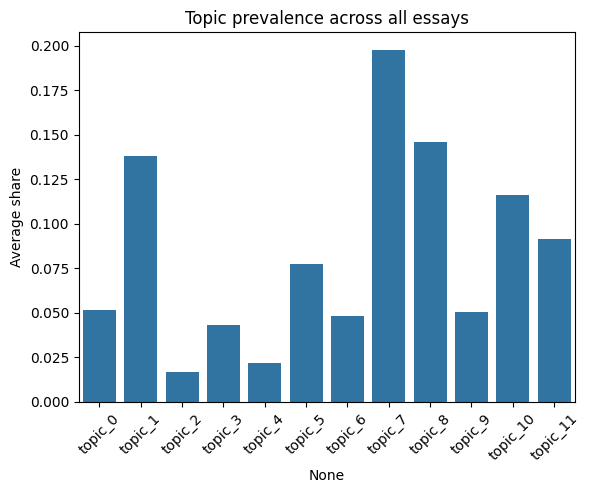

In [4]:
plt.figure()
sns.barplot(x=doc_topic_df.mean().index, y=doc_topic_df.mean().values)
plt.xticks(rotation=45); plt.ylabel("Average share");
plt.title("Topic prevalence across all essays")
plt.show()


In [5]:
pyldavis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(pyldavis_data)          # in-notebook interactive panel
# pyLDAvis.save_html(pyldavis_data, "lda_vis.html")   # optional export


In [19]:
df = pd.read_csv("/home/semipro321/OneDrive/School/McGill/Research Projects/Essay/essays_corrected_60.csv")
# -------------------------------------------------
# Load the original essays so we can display them
# -------------------------------------------------
df.rename(columns={"corrected": "essay"}, inplace=True)

def top_docs(topic_id, n=5):
    scores = theta[:, topic_id]
    top_idx = scores.argsort()[::-1][:n]
    return top_idx, scores[top_idx]

top_idx, top_scores = top_docs(0, n=3)
for idx, sc in zip(top_idx, top_scores):
    print(f"\nEssay {idx} (share={sc:.2f}):\n",     df.iloc[idx]["essay"][:400], "...")



Essay 43 (share=1.00):
 At the age of twenty-five, I would have a job as a train driver. My home interests would be carpentry and gardening *I know how to tell different kinds of wood* and different tools then I could make tables, chairs, and cabinets. I would also house gardening because the house does not look tidy. I garden isn't it? I wouldn't buy any plants; I would buy seeds and water them and watch them grow full  ...

Essay 44 (share=1.00):
 I live in a small furnished flat and I do many things in it. I have a small mini car which is blue. Nearly every evening I go out in it and visit people I know. Sometimes they give parties and they invite me to them. I like doing knitting and making things to eat. Sometimes I go out for walks in different parks and other places. At weekends when I am home from work I go and see places of interest. ...

Essay 54 (share=1.00):
 Here's the corrected text:

Today is my 25th Birthday and next Saturday I am getting married. And would like three 

In [20]:

# rebuild token list from (corpus, dictionary)
texts_tok = [
    [dictionary[w_id] for w_id, freq in doc for _ in range(freq)]
    for doc in corpus
]

from gensim.models.coherencemodel import CoherenceModel
coh = CoherenceModel(model=lda,
                     texts=texts_tok,
                     dictionary=dictionary,
                     coherence="c_v")
print("Coherence:", coh.get_coherence())

Coherence: 0.37876159897253625
